high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[ 49.563999  50.905998  50.372002 ... 670.969971 683.799988 677.02002 ]
967.9080000000001
48.39540000000001
960.0820000000001
48.00410000000001
950.968002
47.548400099999995
942.0520010000001
47.10260005000001
932.6719999999999
46.633599999999994
923.554
46.1777
915.012
45.7506
907.2520020000002
45.36260010000001
900.6360010000002
45.03180005000001
893.9420010000002
44.69710005000001
886.8220020000002
44.34110010000001
879.6560020000002
43.982800100000006
873.2780030000001
43.66390015
868.760001
43.43800005
865.2160030000002
43.26080015000001
861.5020020000002
43.07510010000001
858.9500000000002
42.947500000000005
858.2299990000001
42.91149995000001
859.7219990000001
42.98609995
860.872001
43.043600049999995
865.5559999999998
43.27779999999999
870.9220009999999
43.54610004999999
875.002003
43.750100149999994
877.304001
43.86520005
879.356003
43.96780015
880.6900029999999
44.03450015
883.2980049999998
44

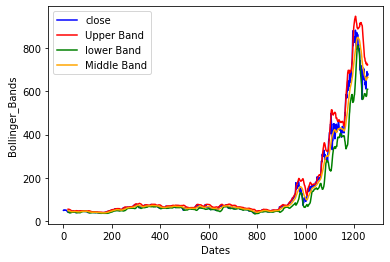

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/TSLA.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
